In [16]:
#HW 5 Gregory Sylvester

import numpy as np
import numpy.linalg as ln
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity as cs

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#export file to html then pdf
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/CSI5810-HW5.ipynb'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CSI5810-HW5.ipynb to html
[NbConvertApp] Writing 810238 bytes to /content/drive/MyDrive/Colab Notebooks/CSI5810-HW5.html


# 1.
-------
A transaction database is given below. Using the A-priori algorithm, determine all frequent item-sets with minimum support of 30%. Show results at each step of the algorithm.

TID#		Items Bought

1		A, B, D, E

2		B, C, D

3		A, B, D, E

4		A, C, D, E

5		B, C, D, E

6		B, D, E

7		C, D

8		A, B, C

9		A, D, E

10		B, D


In [2]:
#A - 0; B - 1; C - 2; D - 3; E - 4
data_set = [[0,1,3,4],[1,2,3],[0,1,3,4],[0,2,3,4],[1,2,3,4],[1,3,4],[2,3],[0,1,2],[0,3,4],[1,3]]

te = TransactionEncoder()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
te_encodedData = te.fit(data_set).transform(data_set)
df = pd.DataFrame(te_encodedData, columns = te.columns_)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
apriori(df, min_support=0.3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.5,(0)
1,0.7,(1)
2,0.5,(2)
3,0.9,(3)
4,0.6,(4)
5,0.3,"(0, 1)"
6,0.4,"(0, 3)"
7,0.4,"(0, 4)"
8,0.3,"(1, 2)"
9,0.6,"(1, 3)"


#2
--------
Consider the following simple IR situation. We have five keywords and six documents. The term-document matrix is given by the following matrix F.

  D1 D2 D3 D4 D5 D6

K1  1 0 1 0	0	0

K2  0	1	0	0	0	0

K3	1	1	0	0	0	0

K4	1	0	0	1	1	0

K5	0	0	0	1	0	1


(i) Obtain the singular value decomposition of F.

(ii) Reconstruct F ignoring the smaller of the two singular values.

(iii) Show the representation of the documents and the keywords in the 2-D space after SVD application.

(iv) Using the cosine similarity measure in the LSI space, calculate the document similarity matrix.


In [8]:
F = np.array([[1, 0, 1, 0, 0, 0],[0, 1, 0, 0, 0, 0],[1, 1 ,0 ,0, 0, 0],[1, 0, 0, 1, 1, 0],[0, 0, 0, 1, 0, 1]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# i Obtain the singular value decomposition of F.
U, s, Vh = ln.svd(F,full_matrices=False)
print(U)

[[ 4.40347480e-01 -2.96174360e-01 -5.69497581e-01  5.77350269e-01
  -2.46402144e-01]
 [ 1.29346349e-01 -3.31450692e-01  5.87021697e-01  1.11022302e-16
  -7.27197008e-01]
 [ 4.75530263e-01 -5.11115242e-01  3.67689978e-01  1.11022302e-16
   6.14358412e-01]
 [ 7.03020318e-01  3.50572409e-01 -1.54905878e-01 -5.77350269e-01
  -1.59788154e-01]
 [ 2.62672838e-01  6.46746769e-01  4.14591704e-01  5.77350269e-01
   8.66139898e-02]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# ii Reconstruct F ignoring the smaller of the two singular values.
s[2:] = 0
U_prime = (U * s)
F_prime = np.dot(U_prime, Vh)
print("U_prime: \n", U_prime)
print("\n\n\nF_prime: \n", F_prime)

U_prime: 
 [[ 0.95225185 -0.47221518 -0.          0.         -0.        ]
 [ 0.2797116  -0.52845914  0.          0.         -0.        ]
 [ 1.02833465 -0.81491313  0.          0.          0.        ]
 [ 1.52028211  0.55894647 -0.         -0.         -0.        ]
 [ 0.56803026  1.03116165  0.          0.          0.        ]]



F_prime: 
 [[ 0.8481456   0.51590232  0.28162515  0.12986018  0.20574267 -0.07588249]
 [ 0.36077778  0.35750764  0.15512454 -0.20565325 -0.02526436 -0.18038889]
 [ 1.00327014  0.71828543  0.36077778 -0.05052871  0.15512454 -0.20565325]
 [ 0.97800578  0.12986018  0.20574267  1.0285345   0.61713858  0.41139591]
 [ 0.12986018 -0.38604214 -0.07588249  0.89867432  0.41139591  0.4872784 ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


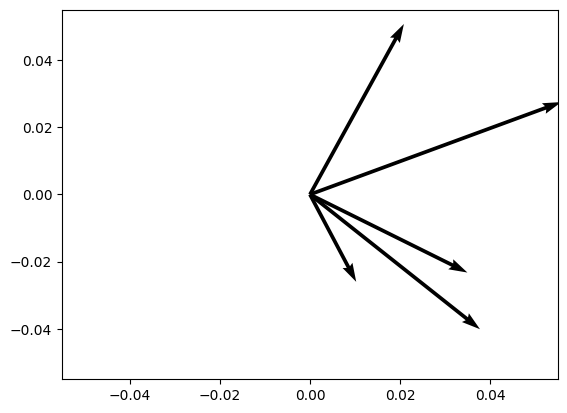

In [11]:
# iii Show the representation of the documents and the keywords in the 2-D space after SVD application
zero_5 = np.array([0,0,0,0,0])
plt.quiver(zero_5,zero_5,U_prime[:,0], U_prime[:,1],scale=3)


In [21]:
# iv Using the cosine similarity measure in the LSI space, calculate the document similarity matrix.
cos_sim = cs(U_prime[:,:2],U_prime[:,:2])
print(cos_sim)

[[ 1.          0.81176374  0.97807901  0.68755734  0.0431365 ]
 [ 0.81176374  1.          0.91557488  0.13408432 -0.54842575]
 [ 0.97807901  0.91557488  1.          0.52128036 -0.16584937]
 [ 0.68755734  0.13408432  0.52128036  1.          0.75511302]
 [ 0.0431365  -0.54842575 -0.16584937  0.75511302  1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3
--------
This exercise is based on Section 9.4 of Recommender System chapter posted on Moodle. In this section, the issue of sparse entries in the user-item matrix is discussed with the SVD approach. Carefully read the chapter and do Exercise 9.4.1 given on page 316. Provide details of calculations of each step of your work.

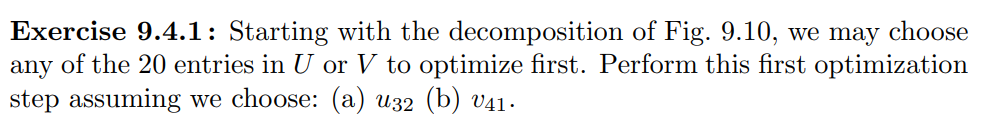

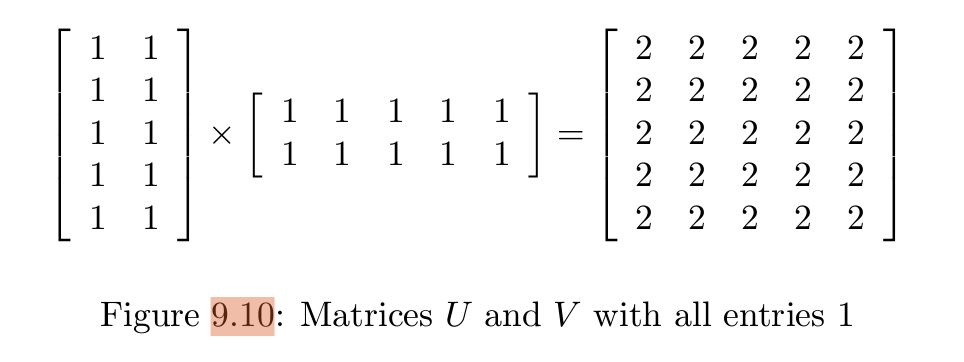

*couldn't upload image to google colab so it is attached to the bottom of the pdf

# 4
-------
Compute the PageRank vector of the following graph. Assume p = 0.2

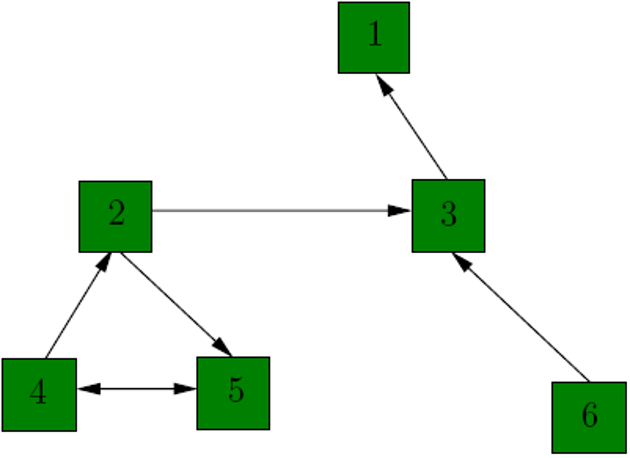

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


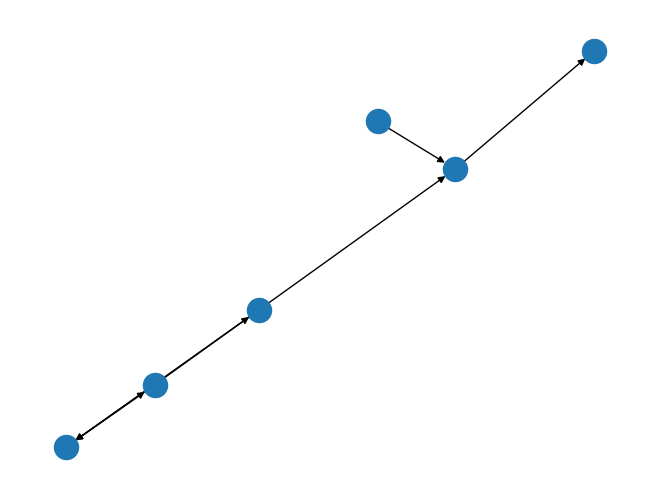

In [47]:
G = nx.DiGraph()
edgelist = [(4,5,1),(5,4,1),(4,2,1),(2,5,1),(2,3,1),(6,3,1),(3,1,1)]
G.add_weighted_edges_from(edgelist)
nx.draw(G)

In [52]:
pr = nx.pagerank(G, alpha =.8)
print(pr)

{4: 0.22600043862651734, 5: 0.20894378212258757, 2: 0.14924567986225368, 3: 0.16562078839698977, 6: 0.05884572245079141, 1: 0.1913435885408602}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
